# Extra Credit (6 pts) - Bootstrap

## Nisha Dalal nd8288

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

1. (6 pts) You record the resting potential of a cell (see below). Use 100,000 bootstrapped samples to estimate the 95% confidence interval for the variance of the resting potential. Plot the distribution of bootstraped variances and indicate the 95% confidence intervals with vertical lines. **!!! DO NOT USE A FOR LOOP. Use NumPy to generate all bootstrapped sample statistics at once (one line of code).**

In [2]:
restingPotential_mV = np.array([-85.06885608, -68.0333149 , -77.04147864, -70.82636201,
       -73.11516394, -70.87124656, -69.8945143 , -71.35017797,
       -78.97700081, -76.06762065, -80.16301496, -75.53757879,
       -66.29208026, -84.46635021, -74.99594162, -81.64926101,
       -69.43971079, -60.09946296, -66.79822251, -60.85633766,
       -54.32637416, -66.45195357, -82.98456323, -81.95661922,
       -60.47209247, -80.55272128, -62.85999264, -86.59379859,
       -78.64488589, -68.84506935, -80.77647186, -67.85623328,
       -74.45114227, -89.65579119, -82.64751201, -63.75968145,
       -74.22283582, -59.31586296, -93.0908073 , -73.64374549,
       -62.68738212, -57.96506437, -72.3717666 , -86.33058942,
       -78.92751452, -58.80136699, -85.71378949, -57.19191734,
       -91.30229149, -75.05287933, -75.33300218, -62.74969485,
       -79.59156555, -52.61256484, -77.21434863, -83.18228806,
       -62.06267252, -68.56599363, -74.33860286, -74.25433867,
       -67.10062548, -70.91001388, -74.54319772, -89.15247536,
       -72.25311527, -88.42966306, -77.76328165, -68.46582471,
       -75.94389499, -58.47565688, -71.13726886, -82.4352595 ,
       -61.93586705, -83.83289675, -51.7473573 , -72.18052423,
       -77.19392687, -87.97762782, -68.17409172, -62.04925685,
       -72.86214908, -69.43243604, -82.89191418, -67.91943956,
       -59.00530849, -62.53955662, -68.66192422, -73.86176431,
       -63.33605874, -84.78928316, -79.38590405, -85.06698722,
       -77.99176887, -70.8097979 , -70.458364  , -77.83905415,
       -79.05549124, -67.7530506 , -86.29135786, -60.87285052,
       -68.75028368, -69.48216823, -87.97546221, -74.25401398,
       -72.00639248, -73.25242423, -99.49034043, -81.86020062,
       -78.38191113, -68.64333415, -62.26209287, -75.46279644,
       -82.18768283, -77.45752358, -79.82870353, -69.4572625 ,
       -78.32253067, -73.59782921, -72.25046001, -80.64590368,
       -76.92874101, -90.79517065, -73.90324566, -81.67875556,
       -67.59862905, -81.49491813, -75.79660561, -81.14508062,
       -78.95641057, -80.56089537, -80.23390812, -72.4244641 ,
       -87.47818531, -73.59907449, -66.92882851, -67.87048944,
       -69.79223622, -67.11253617, -64.8935525 , -80.52556846,
       -78.19259758, -62.10604477, -95.98603544, -75.95599522,
       -66.3355366 , -80.87436998, -81.5009947 , -88.22430255,
       -83.72971765, -75.86416506, -82.52663772, -53.76916602,
       -66.21196557, -72.93868097, -91.42283677, -80.22444843,
       -75.08391826, -52.05541454, -72.0154604 , -80.24943593,
       -65.97047566, -81.62631839, -73.18646105, -70.85923137,
       -66.05248632, -60.82923084, -59.49883812, -78.38967591,
       -84.79797173, -95.00305539, -78.06355062, -71.60393851,
       -70.37115932, -86.7155815 , -65.38955127, -76.78546928,
       -79.85586826, -76.65572665, -71.50214043, -83.65681821,
       -59.9250123 , -76.05986927, -82.68107711, -70.01703154,
       -74.46337865, -63.38903087, -78.73136431, -76.56253395,
       -72.43137511, -52.60067507, -54.23945626, -63.68117735,
       -88.19424095, -76.29322833, -77.01457066, -72.88256829,
       -67.46931905, -60.91331725, -79.17094879, -74.96126989])

In [3]:
mu, sd = st.norm.fit(restingPotential_mV)

bs = np.zeros((100000,))

bs = [np.random.choice(restingPotential_mV, size=restingPotential_mV.shape, replace=True) for x in range(100000)]

bs_ci = np.quantile(bs, [0.025, 0.975])

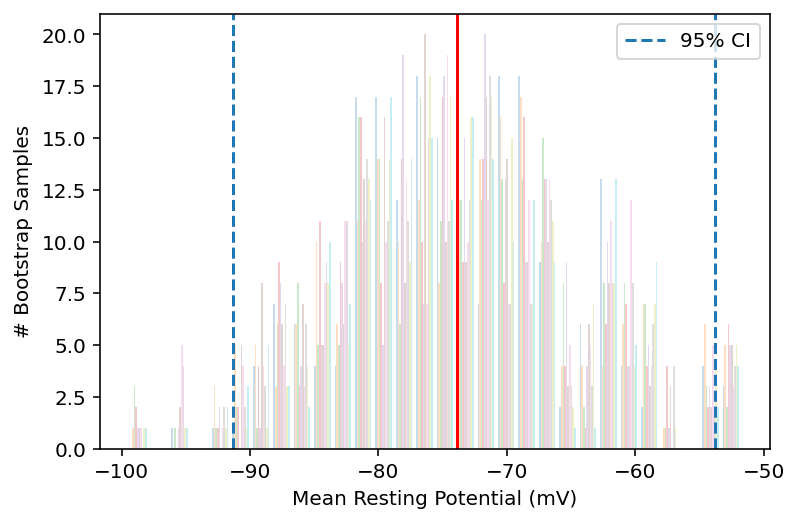

In [5]:
plt.hist(bs, bins=30, alpha=0.25, label='')
plt.axvline(mu, color='r', label='')
plt.axvline(bs_ci[0], linestyle='--', label='95% CI')
plt.axvline(bs_ci[1], linestyle='--', label='')
plt.xlabel('Mean Resting Potential (mV)')
plt.ylabel('# Bootstrap Samples')
plt.legend()
plt.show()